# Double Integration Over General Regions
As seen in the last [article](../double_integration_rectangular/double_integration_rectangular.html), we can use double integration to find the volume of an object, assuming that the object is rectangular around its perimiter. While we can double integrate over a rectangle in a fairly clean fashion, we can also perform double integration over a more general region in a fairly similar manner, but with some minor differences, mainly making the limits of integration of the inner integral in terms of the outer integrals variable of integration.

### Riemann Sum Definition

The Riemann Sum definition for double integration over general regions is somewhat similar for the definition for double integration, with a couple caveats and differences. In order to be able to compute a Riemann Sum for a function over an area, we need to create a partition, usually denoted as $P$, of the area. This is pretty easy for single variable functions and for double integration over rectangular regions. However, when we extend double integration to general regions, we can run into some issues. For example, let's consider the case where we're trying to create a partition for a circle by packing a finite number of rectangles in it:

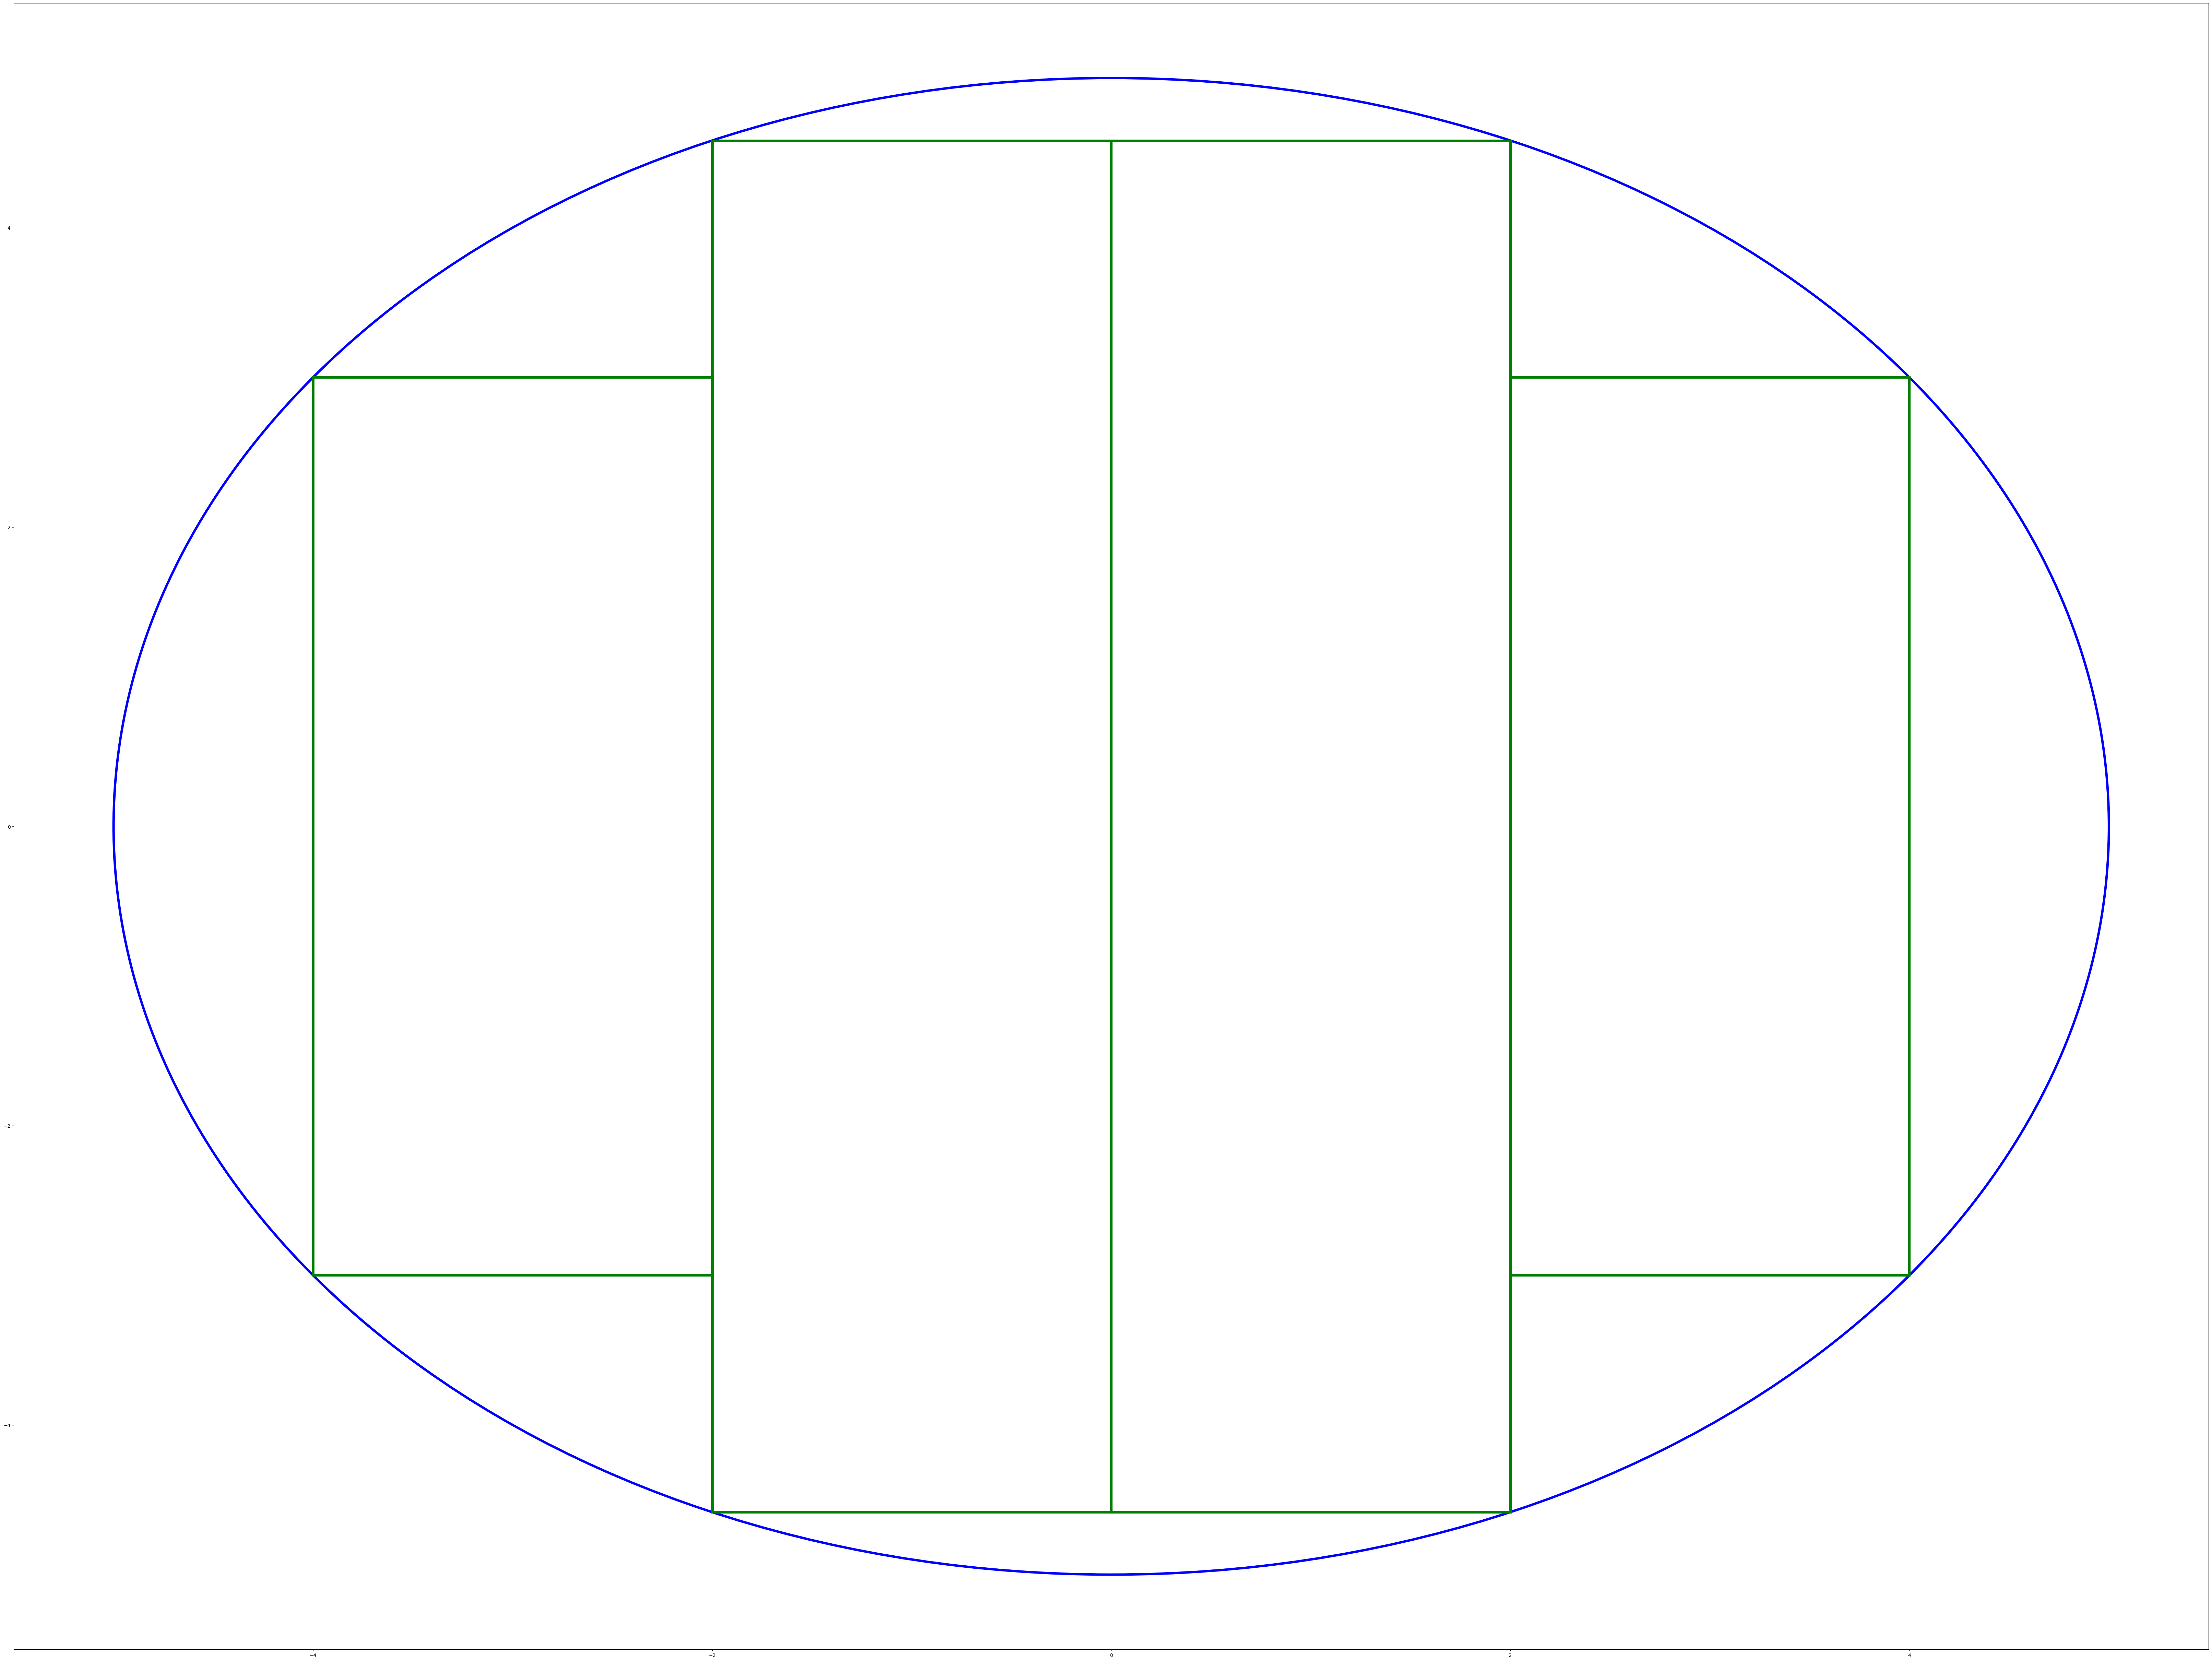

In [23]:
from matplotlib import pyplot, patches
import numpy
import math

fig = pyplot.figure()
ax = fig.add_axes([0,0,10,10])

circle = patches.Circle((0,0), radius=5, linewidth=5, edgecolor='b', facecolor='none')
# use pythagorean theorem to calculate heights/y values of the rectangles
rect1 = patches.Rectangle((-2, -math.sqrt(5**2 - 2**2)), 2, 2 * math.sqrt(5**2 - 2**2), linewidth=5, edgecolor='g', facecolor='none')
rect2 = patches.Rectangle((0, -math.sqrt(5**2 - 2**2)), 2, 2 * math.sqrt(5**2 - 2**2), linewidth=5, edgecolor='g', facecolor='none')
rect3 = patches.Rectangle((-4, -math.sqrt(5**2 - 4**2)), 2, 2 * math.sqrt(5**2 - 4**2), linewidth=5, edgecolor='g', facecolor='none')
rect4 = patches.Rectangle((2, -math.sqrt(5**2 - 4**2)), 2, 2 * math.sqrt(5**2 - 4**2), linewidth=5, edgecolor='g', facecolor='none')

ax.add_patch(circle)
ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.add_patch(rect4)

# plot a single point so the patches will actually show up
ax.plot(0,0)
fig.show()

As you can see from this partition, there is a lot of space between the rectangles and the rest of the circle. This can definitely cause some problems with accuracey, as not only are we only taking the value of the function over a whole rectangular region to only construct a set of rectangular prisms to construct volume, now the rectangular bases of the prisms don't even pack in nicely to the region we're trying to integrate over. There are a couple things that we take into account to help solve these issues. First of all, we note that a partition can only be formed using rectangles that *completely* lie within the region that we're integrating over. None of the rectangles that we're using for the Riemann Sum are allowed to stick out. Then, we use limits. The norm of the partition is defined as the area of the largest rectangle within the partition. If we take the limit of the Riemann Sum as the norm of the partition (ie the area of the largest rectangle approaches zero), we get the double integral. Alternatively, we can also take the Riemann sum as the number of rectangles in the partition of a finite region approaches infinity as the two statements should be equivalent. In mathematical notation, it's a pretty similar formula to what we saw last time for double integration over rectangular regions:
$$S_n = \sum_{k=1}^{n}f(x_k,y_k)\Delta A_k$$
This is the nth partial Riemann sum. In this case, we're iterating over the rectangles. $\Delta A_k$ is the area of the kth rectangle, and $(x_k,y_k)$ is a point that lies within the kth rectangle. If we take the limit of this sum as the norm of the partition $\left \lVert P \right \rVert$ goes to zero, we end up with the following:
$$\lim_{\left \lVert P \right \rVert \to 0} \sum_{k=1}^{n}f(x_k,y_k)\Delta A_k = \iint_{R} f(x_k,y_k)dA$$
There is one main difference from the notation used in the article for rectangular regions, namely the fact that we're allowing the area of each rectangle to vary. This wasn't a strict condition in the last article, just a simplification for the intuition into the definition. With general regions it is much more useful to allow for variable rectangle areas, but it still shouldn't be strictly necessary.

### A Stronger Form of Fubini's Theorem
The version of Fubini's Theorem covered in the previous article is great, but that statement of the theorem didn't cover the case where we wanted to have integrals that have non-constant limits of integration, which as we will see in a moment, is necessary for describing the objects that we want to. There are two cases:

1. The case where R is defined by the inequalities $a \le x \le b$ and $g_1(x) \le y \le g_2(x)$. We are also making the assummption that $g_1(x)$ and $g_2(x)$ are continuous over $[a,b]$. If these conditions hold, then we can make the following statement:
$$\iint_{R}f(x,y)dA = \int_{a}^{b}\int_{g_1(x)}^{g_2(x)}f(x,y)dydx$$
2. The case where R is defined by the inequalities $c \le y \le d$ and $h_1(y) \le x \le h_2(y)$. Again, we're assuming that $h_1(y)$ and $h_2(y)$ are continuous over $[c,d]$. These are the exact same conditions as the last case, except instead of bounding $x$ with constants, we're bounding $y$ with constants. Assuming these preconditions hold, we can make the following statement:
$$\iint_{R}f(x,y)dA = \int_{c}^{d}\int_{h_1(y)}^{h_2(y)}f(x,y)dxdy$$
The double integral over $f(x,y)$ is equal to both of these formulas, which can become important when later when it might be extremely difficult or impossible (especially when limited to elementary functions) to integrate in one way whereas the other way is possible.

### Volumes of Objects that do not Intersect with the XY Plane in a Rectangle
Now that we've seen the definition of the double integral over general regions, we can now start applying it to real world problems. The most clear application of this is volume. Let's say we want to calculate the volume of $f(x,y)=-x^2-y^2+1$ when $f(x,y)>0$. The graph of this function looks like the following:

In [24]:
# Matplotlib code to draw the function above

We know that this function intersects with the XY plane at the circle $x^2+y^2=1$, and we can even write functions to determine x or y given the other. ie:
$$y=\pm \sqrt{1-x^2}$$
$$x=\pm \sqrt{1-y^2}$$
However, this still leaves the question of how we actually set up the double integration for this problem. Just saying we're going to integrate over the region $R$:
$$\iint_{R}(-x^2-y^2+1)dA$$
is a good first step, but it doesn't get us very far. However, using Fubini's theorem, we can transform this integral into something that we can actually integrate over. Let's say we want to have our first integral work over $x$, and the second one work operate over $y$. We know that $y = \pm \sqrt{1-x^2}$, and we know that our limits of integration for the $x$ are $-1$ and $1$. In the form of an expression:
$$\iint_{R}(-x^2-y^2+1)dA=\int_{-1}^{1}\int_{-\sqrt{1-x^2}}^{\sqrt{1-x^2}}(-x^2-y^2+1)dydx$$
Evaluation of this integral is currently left to the reader.

### An Intuitive Method of Deriving This Result

### Properties of Double Integrals

### Example 1
$$f(x,y)=\frac{\sin{x}}{x}$$

### Example 2